In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set the true probability of heads
r_true = 0.8

# Number of tosses per game (10 tosses) and the number of games
tosses_per_game = 10
num_games = 100

# Set the prior
alpha_prior = 10
beta_prior = 190

In [70]:
# Function to simulate coin tosses (returns 1 for heads, 0 for tails)
def simulate_coin_tosses(n, p):
    return np.random.binomial(1, p, n)

# Function to update Beta posterior based on observed heads and tails
def update_posterior(alpha, beta, heads, tails):
    return alpha + heads, beta + tails

# Function to calculate the probability of winning (heads <= 6)
def calculate_winning_probability(heads):
    return 1 if heads <= 6 else 0

# Set the prior by sampling from a uniform distribution between 0 and 0.5
def sample_hyper_strong_biased_tails_prior():
    return np.random.uniform(0, 0.5)

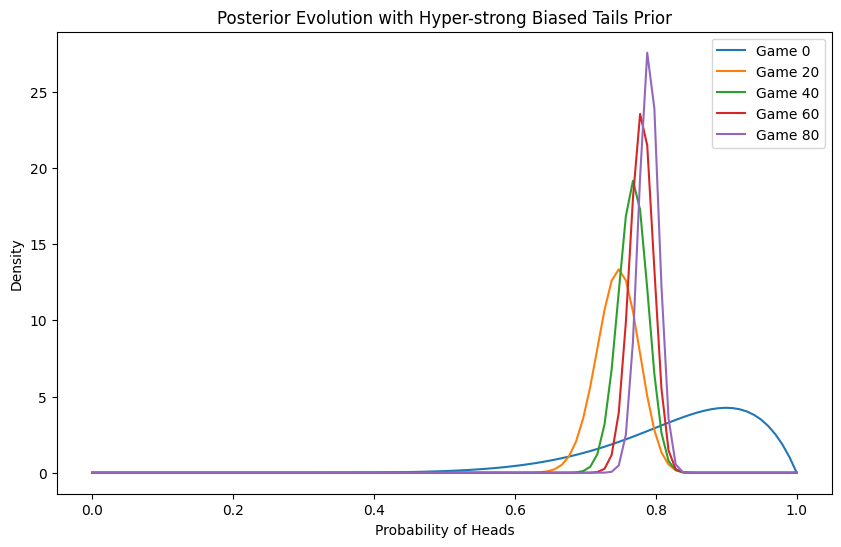

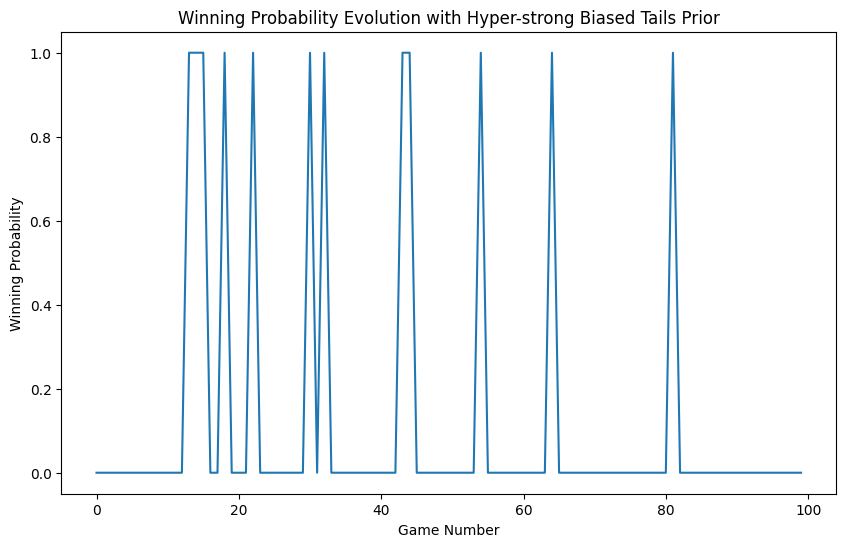

In [71]:
# Initialize the posterior with the hyper-strong biased tails prior
initial_r = sample_hyper_strong_biased_tails_prior()
alpha_prior = 1  # Weak prior for alpha
beta_prior = 1   # Weak prior for beta

alpha, beta_val = alpha_prior, beta_prior

posterior_alphas = []
posterior_betas = []
winning_probabilities = []

# Simulate games and update posterior after each set of tosses
for game in range(num_games):
    tosses = simulate_coin_tosses(tosses_per_game, r_true)
    heads = np.sum(tosses)
    tails = tosses_per_game - heads
    
    # Update posterior using the number of heads and tails
    alpha, beta_val = update_posterior(alpha, beta_val, heads, tails)
    posterior_alphas.append(alpha)
    posterior_betas.append(beta_val)

    # Calculate the probability of winning
    win_prob = calculate_winning_probability(heads)
    winning_probabilities.append(win_prob)

# Visualize the evolution of the posterior
x = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
for i in range(0, num_games, int(num_games/5)):  # Plot at different points during the games
    plt.plot(x, beta.pdf(x, int(posterior_alphas[i]), int(posterior_betas[i])), label=f'Game {i}')
plt.title(f'Posterior Evolution with Hyper-strong Biased Tails Prior')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot the probability of winning
plt.figure(figsize=(10, 6))
plt.plot(range(num_games), winning_probabilities, label='Winning Probability')
plt.title(f'Winning Probability Evolution with Hyper-strong Biased Tails Prior')
plt.xlabel('Game Number')
plt.ylabel('Winning Probability')
plt.show()